# Serializing the dataset (and pickling it).


It is necessary to transform pics into arrays of values before working with them.

- RGB (Red, Green, Blue) are 8 bit each. The range for each individual colour is 0-255 (as 2^8 = 256 possibilities).
The combination range is 256*256*256. Grayscale has just 1D instead.
- By dividing by 255, the 0-255 range can be described with a 0.0-1.0 range where 0.0 means 0 (0x00) and 1.0 means 255 (0xFF). https://scipy-lectures.org/advanced/image_processing/
- Once this is done, we have to change the resolution of the pic. Usually it's 128x128. As you decrease the size of the image it leads to information loss. So, as long as your model performance does not degrades you can keep on reducing the size of the image but their will come a point where decrease in images size will lead decrease in model accuracy. That size is the threshold and you don't want to go below it. 


- Working with this dataset => https://www.kaggle.com/robinreni/house-rooms-image-dataset
- From => https://github.com/albertovpd/viu-fundamentos_redes_neuronales/blob/main/colabs/tasks/task1-deep_vision/preprocesado_caltech101.ipynb

In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tarfile
import pickle

import os
from dotenv import load_dotenv
%matplotlib inline

In [9]:
load_dotenv()
path = os.environ.get("LOCAL_PATH")
os.chdir(path)

folders = os.listdir()
print(folders)
folder_paths = []
all_images = []
all_classes = []
img_size = 128

['Dinning', 'Bedroom', 'Livingroom', 'Kitchen', 'Bathroom']


In [10]:
from PIL import Image

def make_square(image, min_size=img_size, fill_color=(0, 0, 0, 0)):
    '''
    Transforming into the right shape and normalizing
    '''
    size = (min_size, min_size)
    image.thumbnail(size, Image.ANTIALIAS)
    background = Image.new('RGB', size, (255, 255, 255, 0))
    background.paste(
        image, (int((size[0] - image.size[0]) / 2), int((size[1] - image.size[1]) / 2))
    )

    new_img = np.array(background)
    new_img.flatten()
    return new_img

- let's transform every pic into arrays and label them according to their class

In [11]:
for folder in range(len(folders)):
    folder_paths = path+str('/') + str(folders[folder])+str('/')
    os.chdir(folder_paths)
    image_in_folder = os.listdir()
    
    for image in range(len(image_in_folder)):
        img = Image.open(image_in_folder[image])
        img = make_square(img) # here pics are transformend into 255 scale and normalized
        
        all_images.append(img.flatten()/255)
        all_classes.append(folders[folder])

In [12]:
print(all_classes[:5])

['Dinning', 'Dinning', 'Dinning', 'Dinning', 'Dinning']


In [13]:
len(all_images)
print(all_images[:5])

[array([0.54509804, 0.54509804, 0.54509804, ..., 0.44313725, 0.40784314,
       0.41176471]), array([0.99607843, 1.        , 1.        , ..., 0.99607843, 1.        ,
       1.        ]), array([0.74509804, 0.71764706, 0.68627451, ..., 0.16470588, 0.14117647,
       0.13333333]), array([1., 1., 1., ..., 1., 1., 1.]), array([0.44313725, 0.4       , 0.28235294, ..., 0.90588235, 0.88235294,
       0.89019608])]


------------------------------

## uint8 ?

In [19]:
# transformed into 255 scaled above
np.max(all_images)

1.0

----------------------------------------

- brief balance exploration (i'll have to deal with that later)

In [14]:
for e in set(all_classes):
    print("{} class: {} ocurrences".format(e, all_classes.count(e)))  

Bedroom class: 1248 ocurrences
Kitchen class: 965 ocurrences
Dinning class: 1158 ocurrences
Bathroom class: 606 ocurrences
Livingroom class: 1273 ocurrences


In [50]:
print(len(all_classes), len(all_images))

5250 5250


In [51]:
# convert to shape 128x128x3
all_images_df = np.asarray(all_images).reshape(len(all_images),128,128,3)
all_images_df.shape

(5250, 128, 128, 3)

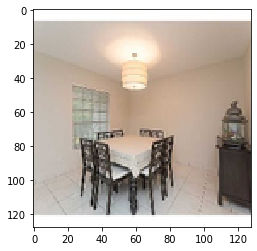

In [52]:
# show image
imgplot = plt.imshow(all_images_df[100])
plt.show()

In [53]:
import sys
sys.getsizeof(all_images_df)

144

In [54]:
#!ls

In [55]:
import pickle

os.chdir(path)

pickle_out = open("pickle_all_images_df.pickle","wb")
pickle.dump(all_images_df, pickle_out)
pickle_out.close()

pickle_out = open("pickle_all_classes.pickle","wb")
pickle.dump(all_classes, pickle_out)
pickle_out.close()

In [56]:
with open(r"pickle_all_images_df.pickle", "rb") as input_file:
    load_data = pickle.load(input_file)

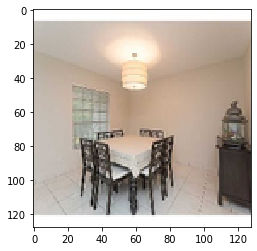

In [58]:
# show image
imgplot = plt.imshow(load_data[100])
plt.show()